In [1]:
# Group 1: Youssaf, Triet, Michael, Mohammad

#Group 1 You will analyze the deterministic version of the genetic switch system described in section
#III of the paper by Loinger, et al. (the one discussing the stochastic genetic switch). The
#differential equation is given in Eq. (9).
# 1/ Construct a Petri net representation of the system based on the description in the text
#(you can also consider the master equation given in the same section). How does the
# 2/ ODE relate to this representation? Why is this called an exclusive switch?
# 3/ Solve the ODE numerically and show the different trajectories in the phase plane.
#Coordinate with Group 2 on the parameters { use the ones in the paper. The nullclines
#are the solution to the equations A0 = 0 and B0 = 0. As discussed in the paper by
#Gardner, et al. they determine the behavior of the deterministic system (See Fig. 2).
#Perform the equivalent analysis for the system in Eq. (9).
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# define system in terms of a Numpy array
alpha0=0.2
alpha1=0.01
k=alpha0/alpha1
g=0.2
d=0.005
def Sys(X, t=0):
    """ The rate equations that describe the BRD switch, """
    # here X[0] = [A] and x[1] = [B]    
    return np.array([ g/(1+k*X[1]/(1+k*X[0]))-d*X[0] , g/(1+k*X[0]/(1+k*X[1]))-d*X[1]])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 1000000,  1000000)
# initial values: A0 = 10, B0 = 2
Sys0 = np.array([10, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='Protein A, A0=10')
ax1.plot(y, 'b-', label='Protein B, B0=2')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("Protein A")
ax2.set_ylabel("Protein B")  
ax2.set_title("Phase space")
ax2.grid()

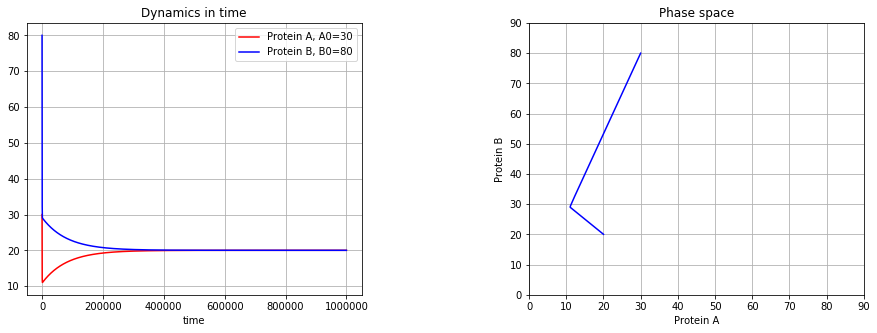

In [2]:
# initial values: A0 = 30, B0 = 80
Sys0 = np.array([30, 80])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='Protein A, A0=30')
ax1.plot(y, 'b-', label='Protein B, B0=80')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("Protein A")
ax2.set_ylabel("Protein B")  
ax2.set_title("Phase space")
ax2.axis([0,90,0,90])
ax2.grid()

In [3]:
import sympy as sm
# define the Chemical reaction system 
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = g/(1+k*c/(1+k*r))-d*r
C = g/(1+k*r/(1+k*c))-d*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(20.0249377333062, 20.0249377333062)]


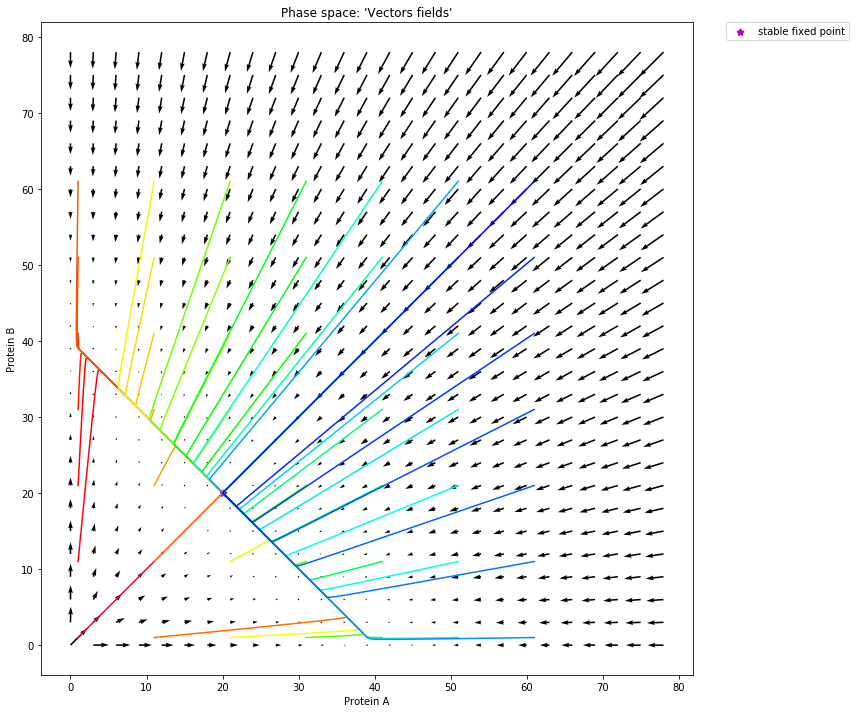

In [4]:
x = np.arange(0,80,3)
y = np.arange(0,80,3)

X,Y = np.meshgrid(x,y)

u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y

fig, ax = plt.subplots(figsize=(12,12))
ax.quiver(X,Y,u,v,scale=None, scale_units='inches')
# initial values: A0 = 30, B0 = 80
x0 = np.arange(1,80,10)
y0 = x0
color=iter(cm.gist_rainbow(np.linspace(0,1,len(x0)*len(y0))))
for i in range(len(x0)-1):
    for j in range(len(y0)-1):
        Z, infodict = integrate.odeint(Sys, [x0[i],y0[j]], t, full_output=True) #solve ode using scipy integrate
        A, B = Z.T
        c_now = next(color)
        ax.plot(A, B, color = c_now)
ax.scatter(((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), ((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), marker='*', color='m',linewidth=2, label='stable fixed point')
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

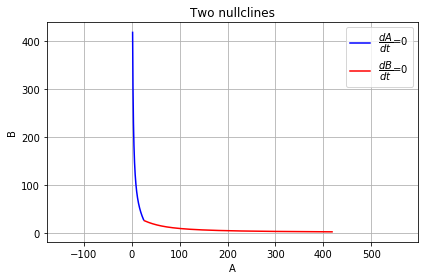

In [5]:
#plotting two nullclines
#print("k= ",k)
k=0.05
fig3, ax3 = plt.subplots(1, 1)
A=  np.linspace(2, 25,  1000)
B=  A
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
ax3.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax3.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
plt.legend(loc='best')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Two nullclines')
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.savefig('challenge_4.png')
plt.show()

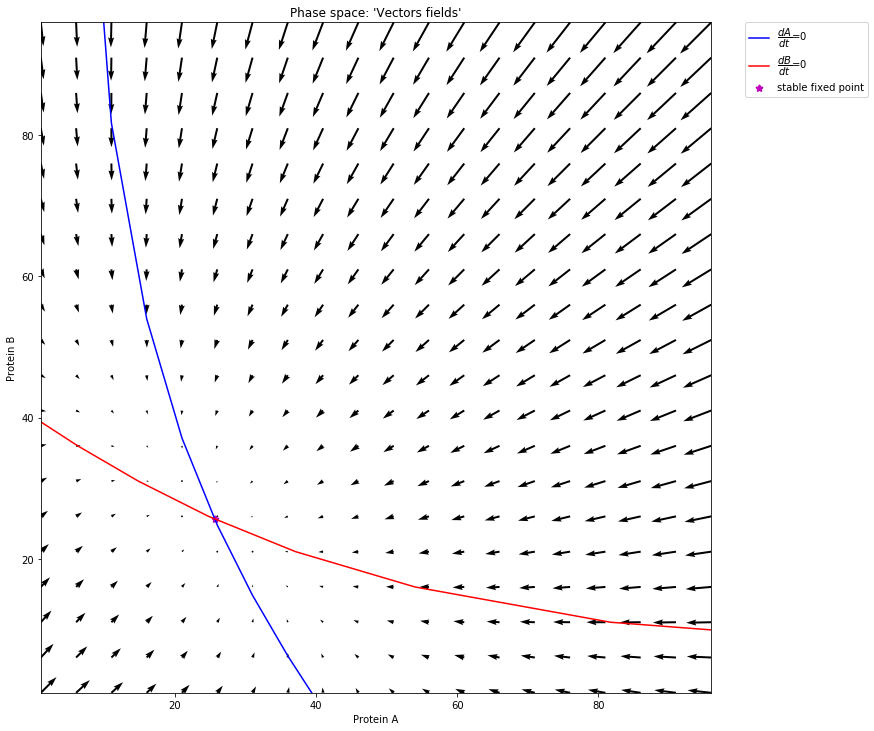

In [6]:
k = 0.05
x = np.arange(1,100,5)
y = np.arange(1,100,5)

X,Y = np.meshgrid(x,y)

u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y
A = x
B = y
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)
ax.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
ax.scatter(((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), ((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), marker='*', color='m',linewidth=2, label='stable fixed point')
ax.axis([x[0],x[-1],y[0],y[-1]])
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

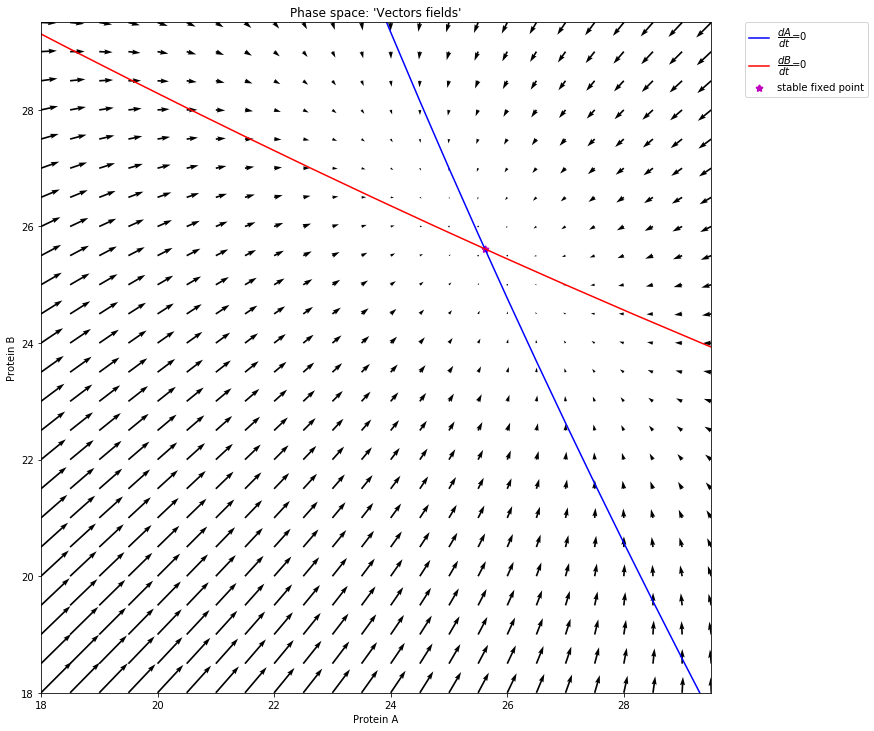

In [7]:
k = 0.05
x = np.arange(18,30,0.5)
y = np.arange(18,30,0.5)

X,Y = np.meshgrid(x,y)

u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y
A = x
B = y
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)
ax.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
ax.scatter(((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), ((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), marker='*', color='m',linewidth=2, label='stable fixed point')
ax.axis([x[0],x[-1],y[0],y[-1]])
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()